In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r"C:\Users\pulla\Downloads\customer_segmentation_analyzed.csv")

In [3]:
print(data.head())

   CustomerID  Gender  Age  AnnualIncome (k$)  SpendingScore (1-100)  Cluster
0           1    Male   19                 15                     39        2
1           2  Female   21                 16                     81        0
2           3  Female   20                 17                      6        1
3           4    Male   23                 19                     77        0
4           5    Male   31                 20                     40        2


In [4]:
print(data.isnull().sum())

CustomerID               0
Gender                   0
Age                      0
AnnualIncome (k$)        0
SpendingScore (1-100)    0
Cluster                  0
dtype: int64


In [5]:
print(data.describe())

       CustomerID        Age  AnnualIncome (k$)  SpendingScore (1-100)  \
count    10.00000  10.000000          10.000000              10.000000   
mean      5.50000  27.000000          27.700000              57.600000   
std       3.02765   7.272475          12.944754              33.363986   
min       1.00000  19.000000          15.000000               3.000000   
25%       3.25000  21.250000          17.500000              39.250000   
50%       5.50000  24.500000          22.500000              74.000000   
75%       7.75000  32.500000          37.500000              80.000000   
max      10.00000  40.000000          50.000000              94.000000   

         Cluster  
count  10.000000  
mean    0.600000  
std     0.843274  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     1.000000  
max     2.000000  


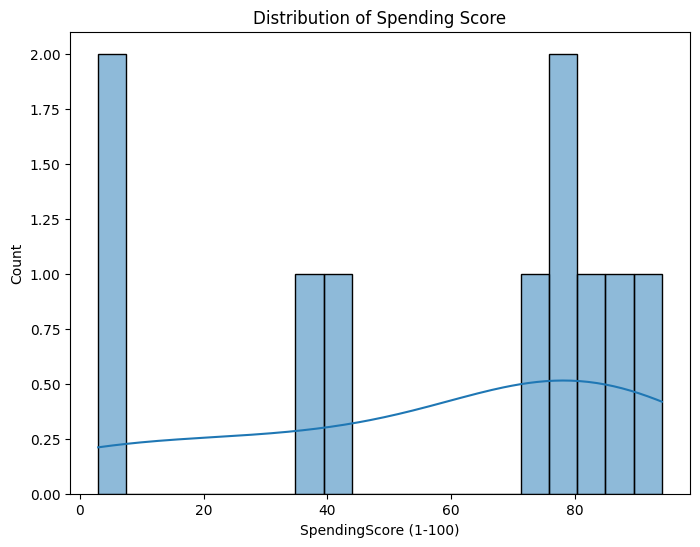

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(data['SpendingScore (1-100)'], bins=20, kde=True)
plt.title("Distribution of Spending Score")
plt.show()

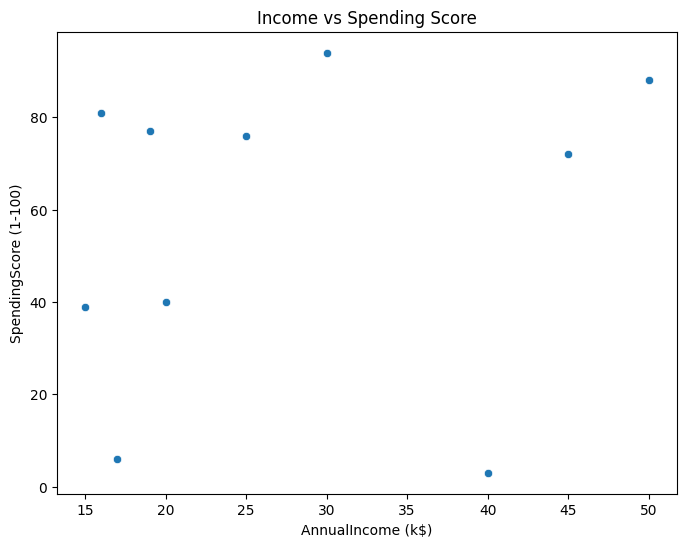

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome (k$)', y='SpendingScore (1-100)', data=data)
plt.title('Income vs Spending Score')
plt.show()

In [11]:
X = data[['AnnualIncome (k$)', 'SpendingScore (1-100)']]

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

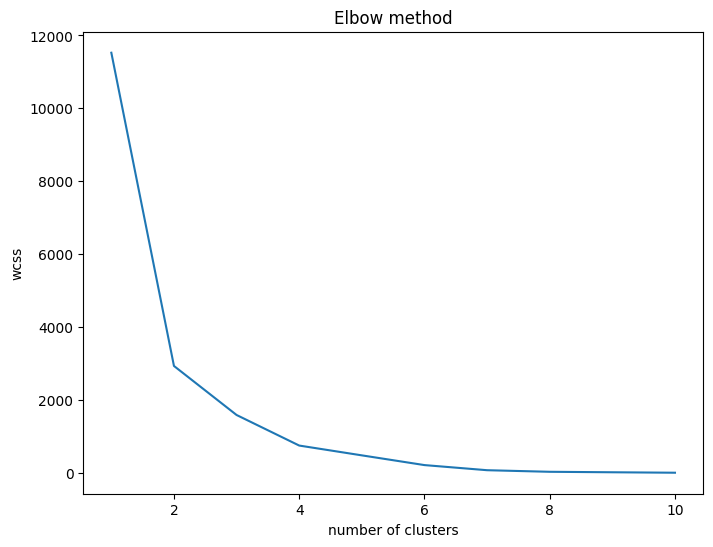

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

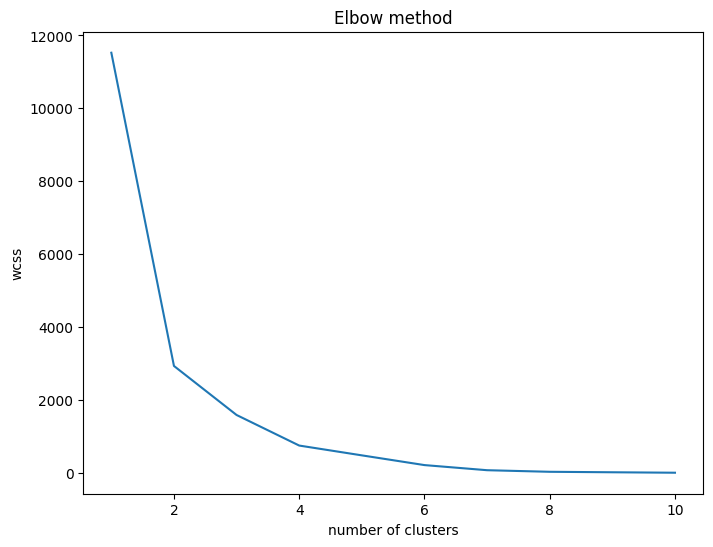

In [15]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

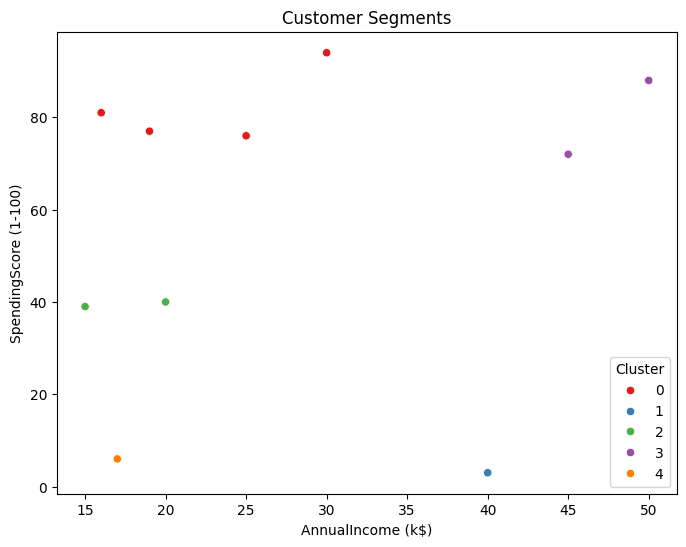

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome (k$)', y='SpendingScore (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segments')
plt.show()
